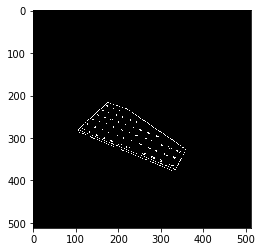

In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
import math

%matplotlib inline


img0 = cv2.imread('wing2.png',0)
img = cv2.imread('/Users/will/projects/legoproj/data_oneofeach/studs_oneofeach/2_studs_a.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)


edged = cv2.Canny(gray, 30, 200)
'''
cv2.imshow('Edges', edged)
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''
plt.imshow(edged,cmap='gray')
plt.show()

kernel = np.ones((2,2), np.uint8) 
edged = cv2.dilate(edged, kernel, iterations=2) 


cv2.imshow('Dilated', edged)
'''
if cv2.waitKey(0) & 0xff == 27:
   cv2.destroyAllWindows()
'''

contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


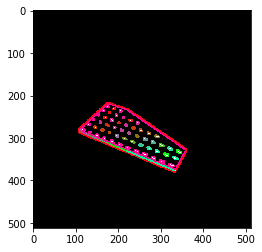

Found contour of length: 7.656854152679443
Found contour of length: 7.656854152679443
Found contour of length: 9.656854152679443
Found contour of length: 35.3137081861496
Found contour of length: 33.31370830535889
Found contour of length: 271.1787132024765
Found contour of length: 33.899494767189026
Found contour of length: 28.485281229019165
Found contour of length: 14.485281229019165
Found contour of length: 7.656854152679443
Found contour of length: 30.97056245803833
Found contour of length: 28.485281229019165
Found contour of length: 14.485281229019165
Found contour of length: 33.899494767189026
Found contour of length: 14.485281229019165
Found contour of length: 5.656854152679443
Found contour of length: 19.313708305358887
Found contour of length: 14.485281229019165
Found contour of length: 32.485281229019165
Found contour of length: 28.485281229019165
Found contour of length: 14.485281229019165
Found contour of length: 5.656854152679443
Found contour of length: 7.656854152679443


In [53]:
img1 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)

num = len(contours)

for i in range(num):
    one = math.floor(i/num * 255)
    other = 255 - one
    b = 150 if i % 2 else 20
    cv2.drawContours(img1, contours, i, (one, other, b), 2)

 
plt.imshow(img1)
plt.show()

for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    print("Found contour of length: " + str(perimeter))

In [66]:
t = contours[-1]


In [67]:
t

array([[[174, 217]],

       [[170, 221]],

       [[169, 221]],

       [[158, 232]],

       [[157, 232]],

       [[145, 244]],

       [[144, 244]],

       [[132, 256]],

       [[131, 256]],

       [[120, 267]],

       [[119, 267]],

       [[106, 280]],

       [[106, 285]],

       [[107, 286]],

       [[107, 288]],

       [[108, 289]],

       [[110, 289]],

       [[111, 290]],

       [[113, 290]],

       [[114, 291]],

       [[115, 291]],

       [[116, 292]],

       [[118, 292]],

       [[119, 293]],

       [[120, 293]],

       [[121, 294]],

       [[123, 294]],

       [[124, 295]],

       [[125, 295]],

       [[126, 296]],

       [[127, 296]],

       [[128, 297]],

       [[130, 297]],

       [[131, 298]],

       [[132, 298]],

       [[133, 299]],

       [[135, 299]],

       [[137, 301]],

       [[139, 301]],

       [[140, 302]],

       [[141, 302]],

       [[142, 303]],

       [[144, 303]],

       [[145, 304]],

       [[146, 304]],

       [[1

In [68]:
approx = cv2.approxPolyDP(t,0.01*cv2.arcLength(t,True),True)

In [116]:
def get_pair(index, points):
    
    num = len(points)
    for i in range(num):
        j = i + 1 if i < num - 1 else 0
        
        if i == index:
            return np.array([points[i], points[j]])
    return None


def get_slopes(points):
    num = len(points)
    slopes = []
    
    for i in range(num):

        j = i + 1 if i < num - 1 else 0
        
        diff = points[j] - points[i]
        
        if diff[1] == 0:
            diff[1] += 1
            
        slope = diff[0]/diff[1]
        slopes.append(tuple([i, slope]))
    
    slopes.sort(key=lambda x: x[1])
    return slopes


def get_parallel_pair(slopes):
    
    num = len(slopes)
    
    for i in range(num):
        j = i + 1 if i < num - 1 else 0
        
        cur0 = slopes[0][1]
        cur1 = slopes[1][1]
        
        if abs(cur1 - cur0) < .5:
            return tuple([cur0[0], cur1[0]])
        
    return None
        

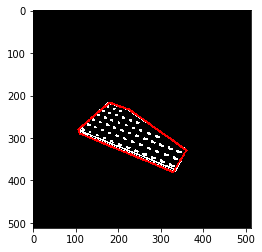

In [117]:
img2 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
cv2.drawContours(img2, [approx], 0, (255, 0, 0), 3)

plt.imshow(img2)
plt.show()

In [118]:
approx = np.reshape(approx, (-1,2))
approx.shape

slopes = get_slopes(approx)
#slopes = get_parallel_pair(slopes)
slopes

[(5, -1.1587301587301588),
 (2, -0.6078431372549019),
 (0, 0.2222222222222222),
 (3, 1.40625),
 (1, 2.4285714285714284),
 (4, 2.875)]

In [119]:
pair = get_pair(5, slopes)

In [128]:
line = get_pair(1,approx)

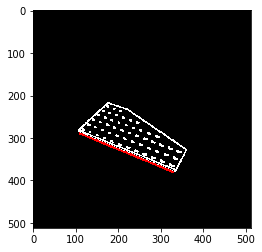

In [129]:
img2 = cv2.cvtColor(edged,cv2.COLOR_GRAY2RGB)
cv2.drawContours(img2, [line], 0, (255, 0, 0), 3)

plt.imshow(img2)
plt.show()